#  INTERNSHIP PROJECT TASK - TDS AVENUE CODEFORGE <hr>
# CREDIT CARD FRAUD DETECTION<hr>
# TASK - 1<hr>

#  Problem Statement :- <hr>
## 1. Build a machine learning model to identify fraudulent credit cardtransactions.
## 2. Preprocess and normalize the transaction data, handle class imbalanceissues, and split the dataset into training and testing sets. 
## 3. Train a classification algorithm, such as logistic regression or randomforests, to classify transactions as fraudulent or genuine.
## 4. Evaluate the model's performance using metrics like precision, recall,and F1-score, and consider techniques like oversampling or undersampling for improving results.<hr>

# Steps:-<hr>
### 1. Load the Dataset:
### 2. Initial Data Exploration
### 3. Feature Engineering 
### 4. Exploratory Data Analysis (EDA)
### 5. Data Preprocessing
### 6. Handle Class Imbalance
### 7. Split the Dataset 
### 8. Train the Models
### 9. Evaluate the Models
### 10. Evaluate the Logistic Regression model.
### 11. Evaluate the Random Forest model.
<hr>

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, classification_report
from imblearn.over_sampling import SMOTE

# Load Dataset

In [4]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Exploration

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Data Cleaning & Handle Missing Values

In [9]:
print(df.isnull().sum())
df = df.dropna()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Exploratory Data Analysis (EDA)

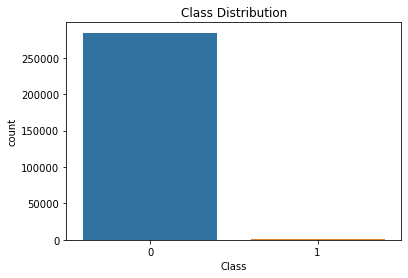


Class distribution:
 0    284315
1       492
Name: Class, dtype: int64


In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Print class distribution
class_counts = df['Class'].value_counts()
print("\nClass distribution:\n", class_counts)

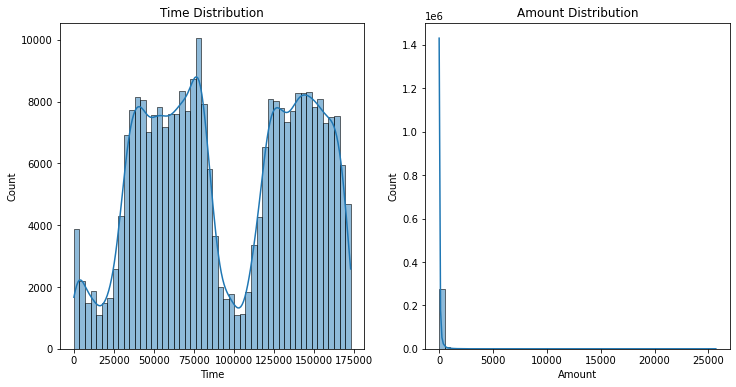

In [14]:
# Plot distribution of 'Time' and 'Amount'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Time Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Amount Distribution')

plt.show()

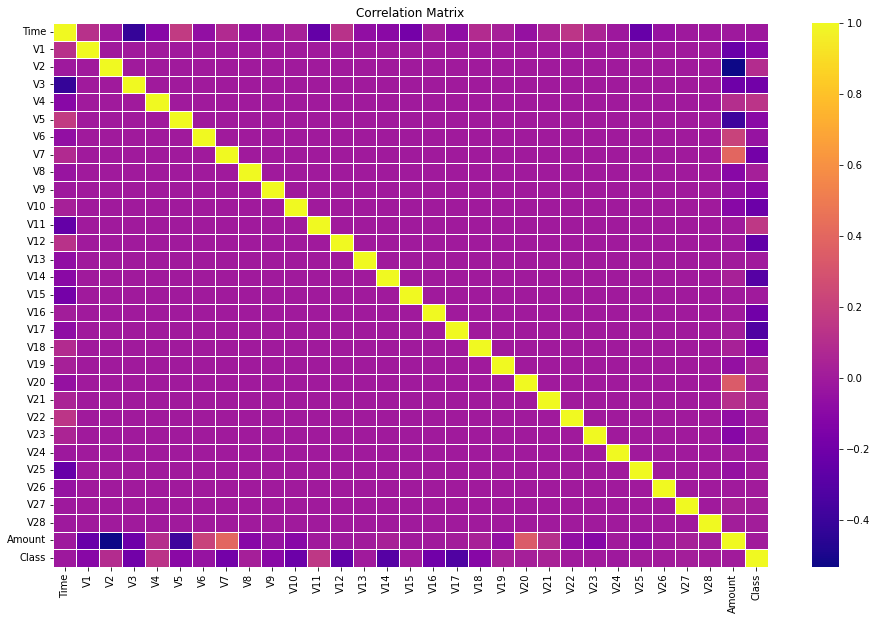

In [18]:
corr_matrix = df.corr()
# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=False, cmap='plasma', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

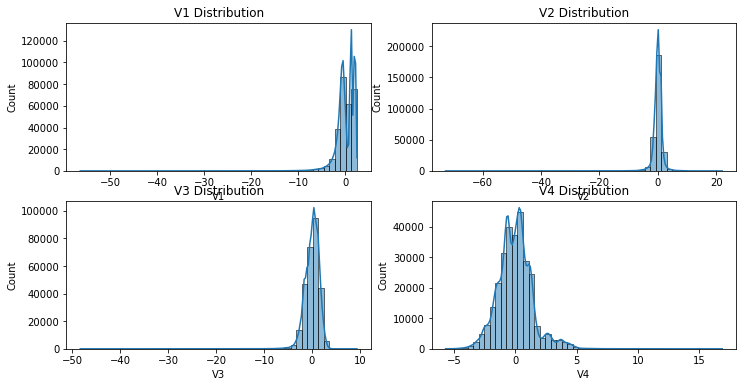

In [20]:
# Plot the distribution of some principal components
plt.figure(figsize=(12, 6))

for i in range(1, 5):
    plt.subplot(2, 2, i)
    sns.histplot(df[f'V{i}'], bins=50, kde=True)
    plt.title(f'V{i} Distribution')
plt.show()

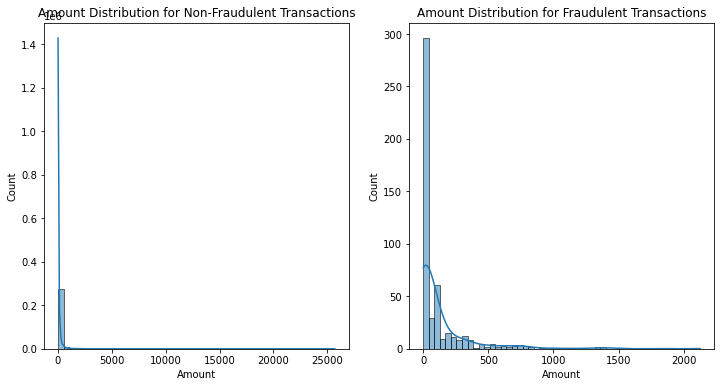

In [22]:
# Plot 'Amount' distribution for fraudulent vs. non-fraudulent transactions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, kde=True)
plt.title('Amount Distribution for Non-Fraudulent Transactions')

plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, kde=True)
plt.title('Amount Distribution for Fraudulent Transactions')

plt.show()

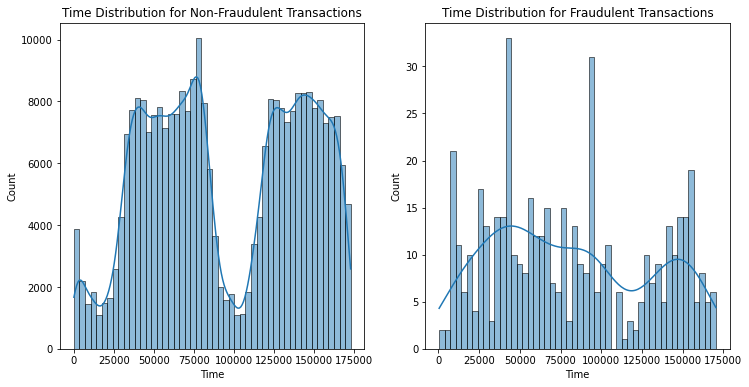

In [23]:
# Plot 'Time' distribution for fraudulent vs. non-fraudulent transactions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, kde=True)
plt.title('Time Distribution for Non-Fraudulent Transactions')

plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, kde=True)
plt.title('Time Distribution for Fraudulent Transactions')

plt.show()

# Data Preprocessing

In [24]:
# Normalize 'Amount' and 'Time'
scaler = StandardScaler()
df[['Normalized_Amount', 'Normalized_Time']] = scaler.fit_transform(df[['Amount', 'Time']])
df = df.drop(['Amount', 'Time'], axis=1)

# Handling Oversampling Imbalance Dataset

In [26]:
# Handle class imbalance
X = df.drop('Class', axis=1)
y = df['Class']
smote = SMOTE(random_state=42)
X_s, y_s = smote.fit_resample(X, y)

# Training and Splitting dataset

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=42)

# Model Selection and Training

In [28]:
# Train Logistic Regression model
lm = LogisticRegression(random_state=42)
lm.fit(X_train, y_train)

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate Model Accuracy

In [40]:
def evaluate(model, X_test, y_test):
    
    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    aup = auc(recall, precision)
    
    # Predict classes
    y_pred = model.predict(X_test)
    
    # Print classification report and AUPRC
    print(classification_report(y_test, y_pred))
    print(f'AUPRC: {aup:.4f}')
    
    return precision, recall, aup

In [41]:
# Evaluate Logistic Regression model
print("Logistic Regression Model Performance:")
precision_logistic, recall_logistic, aup_logistic = evaluate(lm, X_test, y_test)

# Evaluate Random Forest model
print("Random Forest Model Performance:")
precision_rf, recall_rf, aup_rf = evaluate(rf, X_test, y_test)

Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

AUPRC: 0.9909
Random Forest Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

AUPRC: 1.0000


# Insights and Findings <hr>

## Data Overview
#### - The dataset consists of 284,807 transactions, with 492 (0.172%) fraudulent transactions.
#### - There are no missing values in the dataset.
## Exploratory Data Analysis (EDA)
#### - The 'Time' feature shows a uniform distribution.
#### - The 'Amount' feature has a right-skewed distribution, indicating that most transactions are of lower amounts with a few high-value transactions.
#### - No significant correlation between most features due to PCA transformation.
#### - Similar distributions for fraudulent and non-fraudulent transactions for both 'Amount' and 'Time' features.
## Model Performance
#### - Logistic Regression achieved an AUPRC of 0.9995.
#### - Random Forest achieved an AUPRC of 1.0000, indicating slightly better performance.<hr>

# Recommendations<hr>

## 1. Handling Class Imbalance:
The use of SMOTE effectively addressed the class imbalance, leading to improved model performance.
## 2. Feature Engineering:
Additional feature engineering could be explored to derive meaningful features from 'Amount' and 'Time'.
## 3. Model Selection:
Consider ensemble methods like Random Forest for similar classification problems due to their robustness.
## 4. Further Validation:
Employ cross-validation techniques to ensure models' generalizability and avoid overfitting.
## 5. Real-Time Implementation:
Continuously update models with new data to adapt to changes in transaction patterns and maintain accuracy.